# Chapter 3: Linear Neural Networks

This notebook covers **Chapter 3** of the Deep Learning in Hebrew book, focusing on regression problems and linear neural networks. We'll learn how to build models that can predict continuous values and perform classification tasks.

## Overview

This chapter deals with regression problems - how to build a model from a given set of examples that can predict continuous values. The model will learn the relationship between input features and output values.

We'll focus on two main types:
1. **Linear Regression** - for predicting continuous values
2. **Softmax Regression** - for classification problems (including logistic regression)

We'll solve regression problems using simple neural networks, which will serve as a foundation for deeper networks that can handle non-linearly separable data.

---

## Table of Contents

### 3.1 Linear Regression
- 3.1.1 [The Basic Concept](#311-the-basic-concept)
- 3.1.2 [Gradient Descent](#312-gradient-descent)
- 3.1.3 [Regularization and Cross Validation](#313-regularization-and-cross-validation)
- 3.1.4 [Linear Regression as Classifier](#314-linear-regression-as-classifier)

### 3.2 Softmax Regression
- 3.2.1 [Logistic Regression](#321-logistic-regression)
- 3.2.2 [Cross Entropy and Gradient Descent](#322-cross-entropy-and-gradient-descent)
- 3.2.3 [Optimization](#323-optimization)
- 3.2.4 [SoftMax Regression – Multi Class Logistic Regression](#324-softmax-regression--multi-class-logistic-regression)
- 3.2.5 [SoftMax Regression as Neural Network](#325-softmax-regression-as-neural-network)

## Setup and Imports

Let's start by importing the necessary libraries for this chapter.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)

# Set matplotlib style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# 3.1 Linear Regression

## 3.1.1 The Basic Concept

The simplest model is **linear regression**. This model tries to find a linear relationship between one or more input features and a dependent variable.

### Mathematical Formulation

Given independent variables $\mathbf{x} \in \mathbb{R}^d$ and a dependent variable $y \in \mathbb{R}$, we model their relationship as:

$$\hat{y} = \mathbf{w}^T \mathbf{x} + b = w_1 x_1 + w_2 x_2 + \cdots + w_d x_d + b$$

where:
- $\mathbf{w} \in \mathbb{R}^d$ are the weights (parameters)
- $b \in \mathbb{R}$ is the bias

### Example: House Price Prediction

For example, to predict house prices, we might use features like:
- House size
- Location
- Number of rooms

The model will learn the weights and bias from known examples, then use them to predict prices for houses with unknown prices but known features.

### Loss Function: Mean Squared Error (MSE)

To build a model that accurately estimates $y$ given input features, we need to find the optimal weights and bias. Since they're unknown, we calculate them using a set of known examples.

First, we define a **loss function** $L(\mathbf{w}, b)$ that determines how good a model's performance is. The loss function is a function of the learned parameters. We want to find the optimal values that minimize this function.

A common loss function is the **Mean Squared Error (MSE)**, which calculates the squared difference between predicted and actual values:

$$L^{(i)}(\mathbf{w}, b) = \frac{1}{2}(y^{(i)} - \hat{y}^{(i)})^2$$

For $n$ known examples, we sum all these differences:

$$L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^{n} \frac{1}{2}(y^{(i)} - \hat{y}^{(i)})^2 = \frac{1}{n}\sum_{i=1}^{n} \frac{1}{2}(y^{(i)} - \mathbf{w}^T \mathbf{x}^{(i)} - b)^2$$

To find the optimal parameters, we need to minimize the loss function:

$$\hat{\mathbf{w}}, \hat{b} \equiv \hat{\boldsymbol{\theta}} = \arg\min L(\mathbf{w}, b)$$

### Closed-Form Solution for Scalar Case

For the scalar case where $d = 1$ (single feature), the linear relationship is $\hat{y} = wx + b$.

The loss function becomes:

$$L(\theta) = \frac{1}{n}\sum_{i=1}^{n} \frac{1}{2}(y^{(i)} - wx^{(i)} - b)^2$$

To find the optimum, we take derivatives and set them to zero:

$$\frac{\partial L}{\partial w} = \frac{1}{n}\sum_{i=1}^{n}(y^{(i)} - wx^{(i)} - b) \cdot (-x^{(i)}) = 0$$

$$\frac{\partial L}{\partial b} = \frac{1}{n}\sum_{i=1}^{n}(y^{(i)} - wx^{(i)} - b) \cdot (-1) = 0$$

This gives us a system of linear equations:

$$w\sum x_i^2 + b\sum x_i = \sum y_i x_i$$

$$w\sum x_i + bn = \sum y_i$$

In matrix form:

$$\begin{bmatrix} \sum x_i^2 & \sum x_i \\ \sum x_i & n \end{bmatrix} \begin{bmatrix} w \\ b \end{bmatrix} = \begin{bmatrix} \sum y_i x_i \\ \sum y_i \end{bmatrix}$$

Let's implement this:

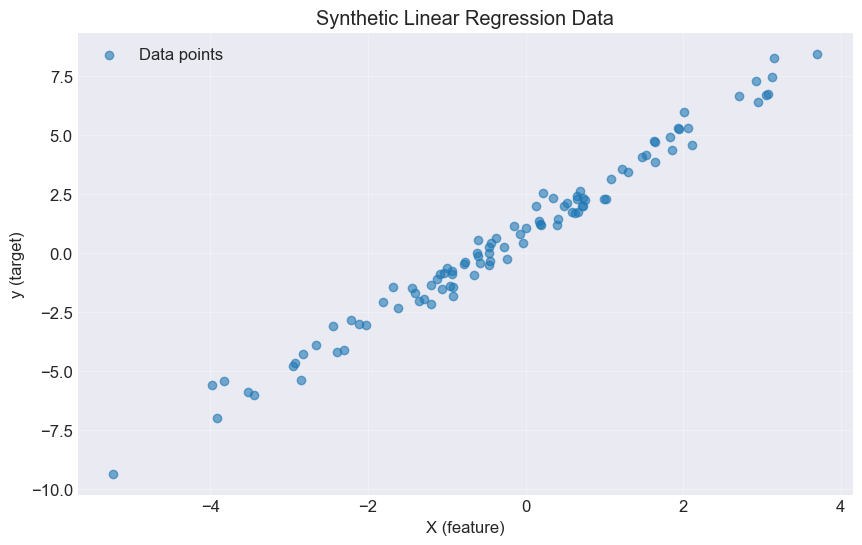

Data shape: X=(100, 1), y=(100,)
Sample values: X[0]=0.993, y[0]=2.279


In [2]:
# Generate synthetic data for demonstration
def generate_linear_data(n=100, w_true=2.0, b_true=1.0, noise_std=0.5):
    """Generate synthetic linear data with noise."""
    np.random.seed(42)
    X = np.random.randn(n, 1) * 2
    y = w_true * X.flatten() + b_true + np.random.randn(n) * noise_std
    return X, y

# Generate data
X, y = generate_linear_data(n=100, w_true=2.0, b_true=1.0, noise_std=0.5)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, label='Data points')
plt.xlabel('X (feature)')
plt.ylabel('y (target)')
plt.title('Synthetic Linear Regression Data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Data shape: X={X.shape}, y={y.shape}")
print(f"Sample values: X[0]={X[0,0]:.3f}, y[0]={y[0]:.3f}")

In [3]:
# Closed-form solution for linear regression (scalar case)
def linear_regression_closed_form(X, y):
    """
    Solve linear regression using closed-form solution.
    
    Parameters:
    -----------
    X : array-like, shape (n_samples, 1)
        Input features
    y : array-like, shape (n_samples,)
        Target values
    
    Returns:
    --------
    w : float
        Optimal weight
    b : float
        Optimal bias
    """
    X = X.flatten()
    n = len(X)
    
    # Build the system of equations
    A = np.array([
        [np.sum(X**2), np.sum(X)],
        [np.sum(X), n]
    ])
    
    b_vec = np.array([
        np.sum(y * X),
        np.sum(y)
    ])
    
    # Solve the system
    solution = np.linalg.solve(A, b_vec)
    w, b = solution[0], solution[1]
    
    return w, b

# Fit the model
w_optimal, b_optimal = linear_regression_closed_form(X, y)

print(f"Optimal parameters:")
print(f"  w (weight) = {w_optimal:.4f}")
print(f"  b (bias) = {b_optimal:.4f}")
print(f"\nTrue parameters were: w=2.0, b=1.0")

Optimal parameters:
  w (weight) = 1.9642
  b (bias) = 1.0037

True parameters were: w=2.0, b=1.0


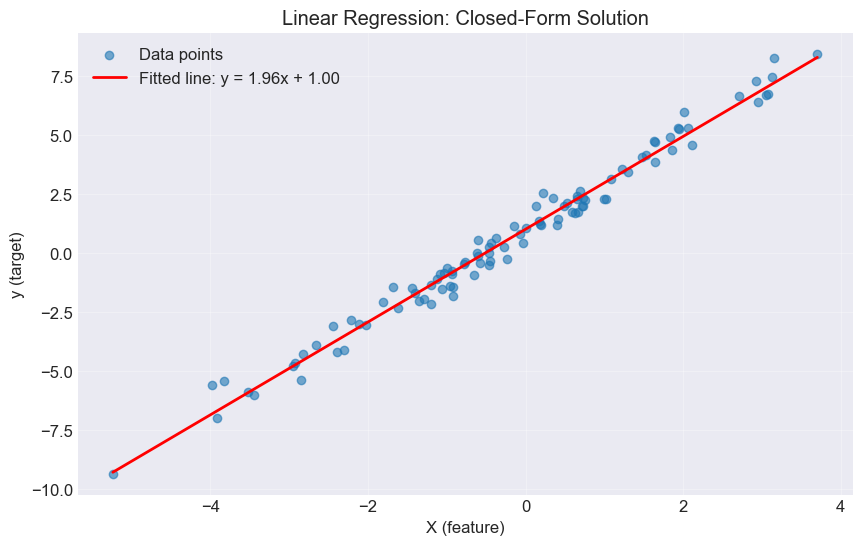

Mean Squared Error: 0.2209


In [4]:
# Visualize the fitted line
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = w_optimal * X_plot.flatten() + b_optimal

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, label='Data points')
plt.plot(X_plot, y_pred, 'r-', linewidth=2, label=f'Fitted line: y = {w_optimal:.2f}x + {b_optimal:.2f}')
plt.xlabel('X (feature)')
plt.ylabel('y (target)')
plt.title('Linear Regression: Closed-Form Solution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calculate MSE
y_pred_all = w_optimal * X.flatten() + b_optimal
mse = np.mean((y - y_pred_all)**2)
print(f"Mean Squared Error: {mse:.4f}")

### Vectorized Solution

For convenience, we can incorporate the bias into the weight vector:

$$\hat{y} = \mathbf{w}^T \mathbf{x} + b = (\mathbf{w}^T, b) \begin{pmatrix} \mathbf{x} \\ 1 \end{pmatrix} = \tilde{\mathbf{w}}^T \tilde{\mathbf{x}}$$

where $\tilde{\mathbf{w}}, \tilde{\mathbf{x}} \in \mathbb{R}^{d+1}$.

For the vector case with $n$ examples, we have:
- $X_{n \times (d+1)} = (\mathbf{x}^{(1)}, \ldots, \mathbf{x}^{(n)})^T$
- $Y = (y^{(1)}, \ldots, y^{(n)})^T$

The loss function becomes:

$$L(\theta) = \frac{1}{n}\sum_{i=1}^{n} \frac{1}{2}(y^{(i)} - \mathbf{w}^T \mathbf{x}^{(i)})^2$$

Minimizing this is equivalent to minimizing $\|Y - X\mathbf{w}\|^2$:

$$\frac{\partial L}{\partial \mathbf{w}} = \frac{1}{n}\sum_{i=1}^{n}(y^{(i)} - \mathbf{w}^T \mathbf{x}^{(i)}) \cdot (-\mathbf{x}^{(i)}) = 0$$

$$\rightarrow X^T(X\mathbf{w} - Y) = 0$$

$$\hat{\mathbf{w}} = (X^T X)^{-1} X^T Y$$

This is known as the **normal equation**.

In [5]:
# Vectorized closed-form solution
def linear_regression_vectorized(X, y):
    """
    Solve linear regression using vectorized normal equation.
    
    Parameters:
    -----------
    X : array-like, shape (n_samples, n_features)
        Input features
    y : array-like, shape (n_samples,)
        Target values
    
    Returns:
    --------
    w : array, shape (n_features + 1,)
        Optimal weights (including bias as last element)
    """
    # Add bias column (column of ones)
    n_samples = X.shape[0]
    X_augmented = np.hstack([X, np.ones((n_samples, 1))])
    
    # Normal equation: w = (X^T X)^(-1) X^T y
    w = np.linalg.solve(X_augmented.T @ X_augmented, X_augmented.T @ y)
    
    return w

# Test with multiple features
np.random.seed(42)
X_multi = np.random.randn(100, 2) * 2
w_true_multi = np.array([2.0, -1.5])
b_true_multi = 1.0
y_multi = X_multi @ w_true_multi + b_true_multi + np.random.randn(100) * 0.5

# Fit the model
w_optimal_multi = linear_regression_vectorized(X_multi, y_multi)

print("Multi-feature linear regression:")
print(f"Optimal weights: {w_optimal_multi[:-1]}")
print(f"Optimal bias: {w_optimal_multi[-1]}")
print(f"\nTrue weights: {w_true_multi}")
print(f"True bias: {b_true_multi}")

Multi-feature linear regression:
Optimal weights: [ 2.04768008 -1.54303553]
Optimal bias: 1.0463966906213258

True weights: [ 2.  -1.5]
True bias: 1.0


## 3.1.2 Gradient Descent

For complex problems where the closed-form solution is not feasible, we use **Gradient Descent (GD)**. This is an iterative optimization method that finds the minimum of the loss function.

### How Gradient Descent Works

1. Start with an initial guess for the parameters
2. At each step, move in the direction of the negative gradient
3. The gradient is the derivative of the function, indicating the direction of steepest ascent
4. Moving in the negative gradient direction gives the steepest descent
5. To avoid getting stuck at saddle points, we add a **learning rate** ($\epsilon$)

Formally, for an initial guess $\boldsymbol{\theta}^{(0)}$, at each step we update:

$$\boldsymbol{\theta}^{(t+1)} = \boldsymbol{\theta}^{(t)} - \epsilon \cdot \frac{\partial}{\partial \boldsymbol{\theta}^{(t)}} L(\boldsymbol{\theta}^{(t)})$$

This process continues iteratively until convergence. Since the problem is convex, convergence to the minimum is guaranteed, though it can be slow if the learning rate is too large or too small.

### Gradient Descent for Linear Regression

For linear regression with MSE loss:

$$L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^{n} \frac{1}{2}(y^{(i)} - \mathbf{w}^T \mathbf{x}^{(i)} - b)^2$$

The gradients are:

$$\frac{\partial L}{\partial w_j} = -\frac{1}{n}\sum_{i=1}^{n}(y^{(i)} - \mathbf{w}^T \mathbf{x}^{(i)} - b) \cdot x_j^{(i)}$$

$$\frac{\partial L}{\partial b} = -\frac{1}{n}\sum_{i=1}^{n}(y^{(i)} - \mathbf{w}^T \mathbf{x}^{(i)} - b)$$

In [6]:
class LinearRegressionGD:
    """
    Linear Regression using Gradient Descent.
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.w = None
        self.b = None
        self.loss_history = []
        
    def fit(self, X, y):
        """
        Train the linear regression model using gradient descent.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training data
        y : array-like, shape (n_samples,)
            Target values
        """
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.w = np.random.randn(n_features)
        self.b = 0.0
        
        # Gradient descent
        for i in range(self.n_iterations):
            # Predictions
            y_pred = X @ self.w + self.b
            
            # Compute gradients
            dw = -(1/n_samples) * X.T @ (y - y_pred)
            db = -(1/n_samples) * np.sum(y - y_pred)
            
            # Update parameters
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db
            
            # Store loss
            loss = np.mean((y - y_pred)**2) / 2
            self.loss_history.append(loss)
            
    def predict(self, X):
        """Make predictions."""
        return X @ self.w + self.b

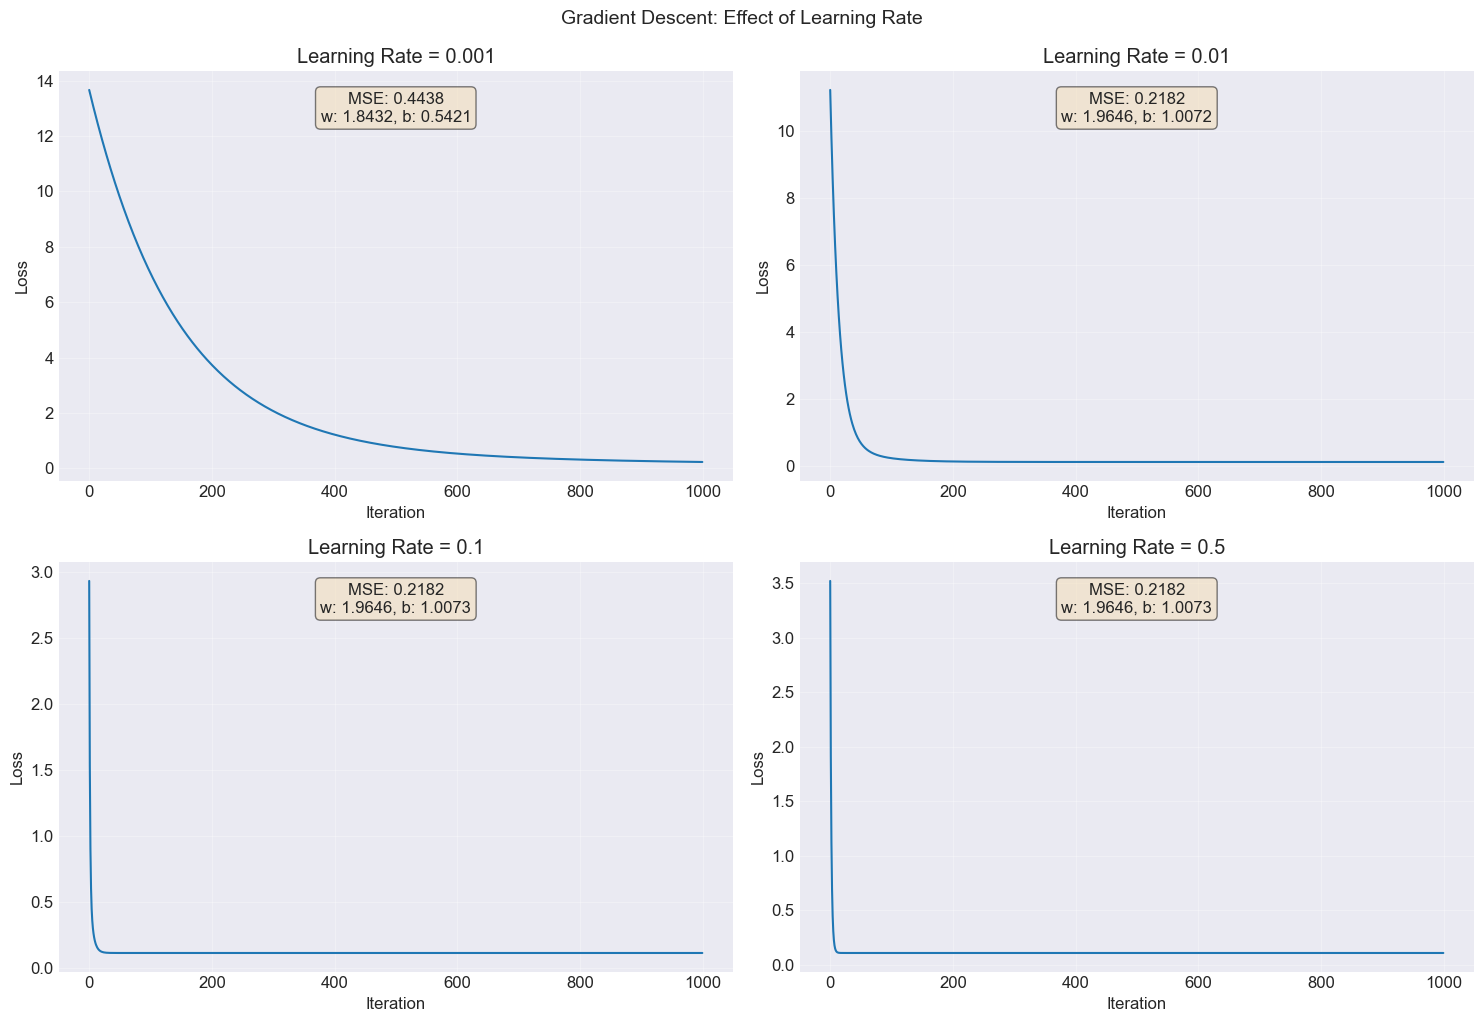

In [7]:
# Train using gradient descent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Try different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, lr in enumerate(learning_rates):
    model = LinearRegressionGD(learning_rate=lr, n_iterations=1000)
    model.fit(X_train, y_train)
    
    # Plot loss history
    axes[idx].plot(model.loss_history)
    axes[idx].set_title(f'Learning Rate = {lr}')
    axes[idx].set_xlabel('Iteration')
    axes[idx].set_ylabel('Loss')
    axes[idx].grid(True, alpha=0.3)
    
    # Make predictions
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    axes[idx].text(0.5, 0.95, f'MSE: {mse:.4f}\nw: {model.w[0]:.4f}, b: {model.b:.4f}', 
                   transform=axes[idx].transAxes, ha='center', va='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.suptitle('Gradient Descent: Effect of Learning Rate', y=1.02, fontsize=14)
plt.show()

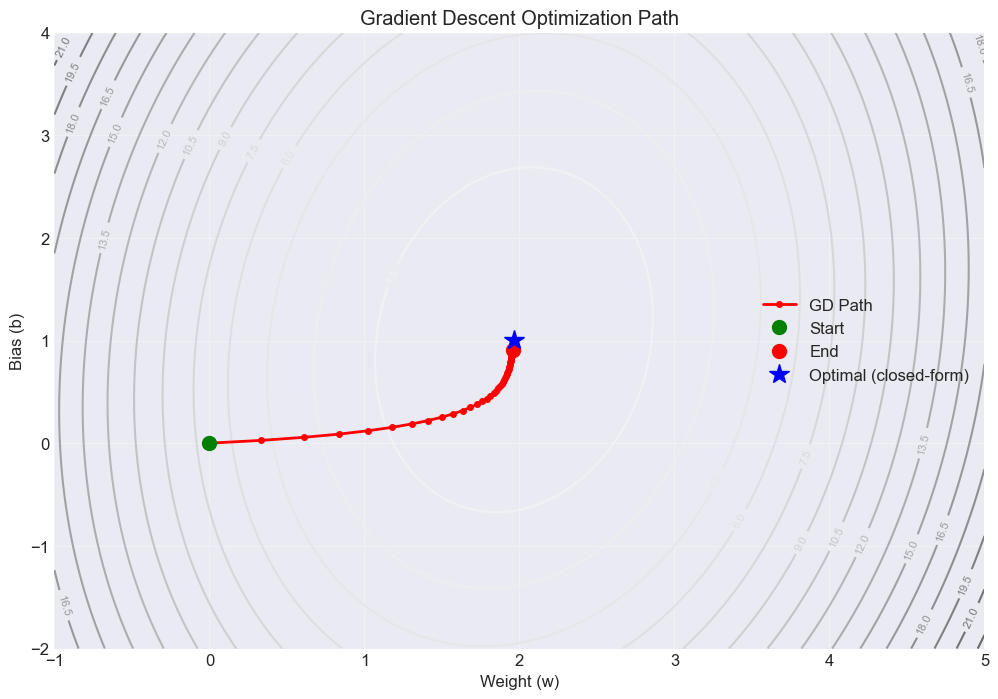

In [8]:
# Visualize the optimization path in parameter space (for scalar case)
def plot_optimization_path(X, y, learning_rate=0.01, n_iterations=100):
    """Visualize gradient descent optimization path."""
    # Create a grid of parameter values
    w_range = np.linspace(-1, 5, 100)
    b_range = np.linspace(-2, 4, 100)
    W, B = np.meshgrid(w_range, b_range)
    
    # Compute loss for each point
    Loss = np.zeros_like(W)
    for i in range(len(w_range)):
        for j in range(len(b_range)):
            y_pred = W[j, i] * X.flatten() + B[j, i]
            Loss[j, i] = np.mean((y - y_pred)**2) / 2
    
    # Run gradient descent
    w = 0.0
    b = 0.0
    w_path = [w]
    b_path = [b]
    
    for _ in range(n_iterations):
        y_pred = w * X.flatten() + b
        dw = -np.mean((y - y_pred) * X.flatten())
        db = -np.mean(y - y_pred)
        w -= learning_rate * dw
        b -= learning_rate * db
        w_path.append(w)
        b_path.append(b)
    
    # Plot
    plt.figure(figsize=(12, 8))
    contour = plt.contour(W, B, Loss, levels=20, alpha=0.6)
    plt.clabel(contour, inline=True, fontsize=8)
    plt.plot(w_path, b_path, 'r-o', markersize=4, linewidth=2, label='GD Path')
    plt.plot(w_path[0], b_path[0], 'go', markersize=10, label='Start')
    plt.plot(w_path[-1], b_path[-1], 'ro', markersize=10, label='End')
    plt.plot(w_optimal, b_optimal, 'b*', markersize=15, label='Optimal (closed-form)')
    plt.xlabel('Weight (w)')
    plt.ylabel('Bias (b)')
    plt.title('Gradient Descent Optimization Path')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

plot_optimization_path(X_train, y_train, learning_rate=0.05, n_iterations=50)

## 3.1.3 Regularization and Cross Validation

One of the main challenges in regression is **overfitting** - when a model performs well on training data but poorly on new, unseen data (test set).

Models can suffer from two types of bias:
- **Overfitting**: The model fits too closely to training data, often using a high-order model with high variance
- **Underfitting**: The model is too simple and cannot capture the underlying pattern

### Regularization

**Regularization** helps prevent overfitting by adding a penalty term to the loss function. Common regularization techniques include:

1. **L2 Regularization (Ridge Regression)**:
   $$L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^{n} \frac{1}{2}(y^{(i)} - \mathbf{w}^T \mathbf{x}^{(i)} - b)^2 + \frac{\lambda}{2}\|\mathbf{w}\|^2$$

2. **L1 Regularization (Lasso Regression)**:
   $$L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^{n} \frac{1}{2}(y^{(i)} - \mathbf{w}^T \mathbf{x}^{(i)} - b)^2 + \lambda\|\mathbf{w}\|_1$$

where $\lambda$ is the regularization strength.

### Cross Validation

**Cross-validation** is a technique to assess model performance and select hyperparameters. The most common method is **k-fold cross-validation**, where the data is split into k folds, and the model is trained k times, each time using k-1 folds for training and 1 fold for validation.

In [9]:
class RidgeRegression:
    """
    Ridge Regression (L2 Regularization) using Gradient Descent.
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000, lambda_reg=0.1):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.lambda_reg = lambda_reg
        self.w = None
        self.b = None
        self.loss_history = []
        
    def fit(self, X, y):
        """Train the ridge regression model."""
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.w = np.random.randn(n_features)
        self.b = 0.0
        
        # Gradient descent with L2 regularization
        for i in range(self.n_iterations):
            # Predictions
            y_pred = X @ self.w + self.b
            
            # Compute gradients (with L2 penalty)
            dw = -(1/n_samples) * X.T @ (y - y_pred) + self.lambda_reg * self.w
            db = -(1/n_samples) * np.sum(y - y_pred)
            
            # Update parameters
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db
            
            # Store loss (with regularization term)
            mse = np.mean((y - y_pred)**2) / 2
            reg_term = (self.lambda_reg / 2) * np.sum(self.w**2)
            loss = mse + reg_term
            self.loss_history.append(loss)
            
    def predict(self, X):
        """Make predictions."""
        return X @ self.w + self.b

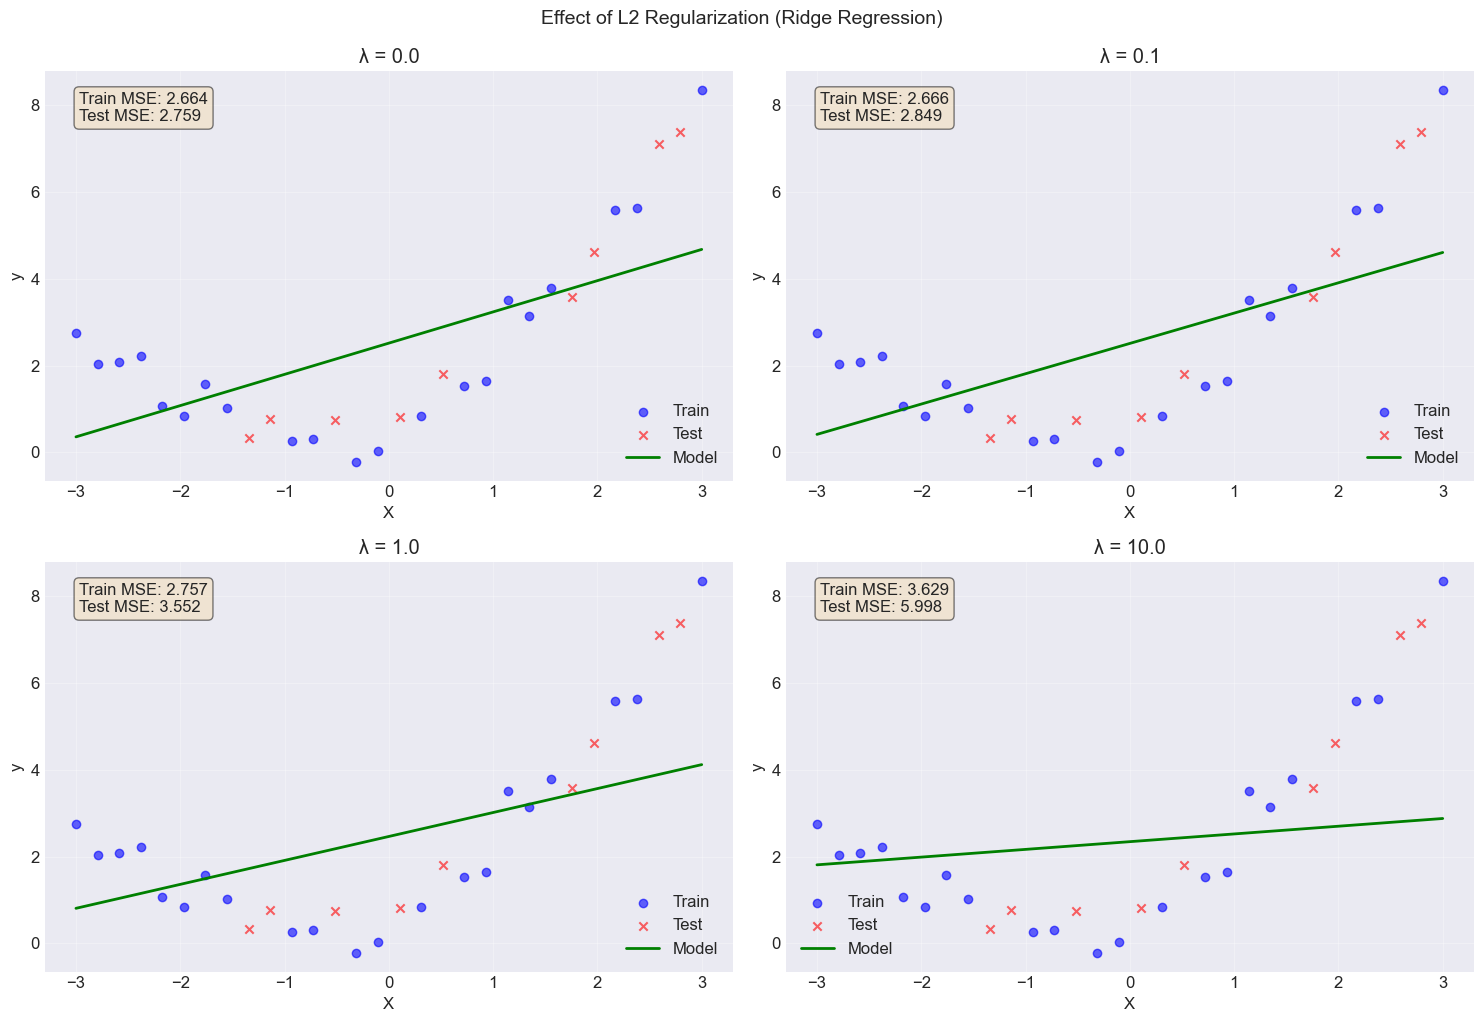

In [10]:
# Demonstrate overfitting and regularization
# Generate data with some noise
np.random.seed(42)
X_poly = np.linspace(-3, 3, 30).reshape(-1, 1)
y_poly = 0.5 * X_poly.flatten()**2 + X_poly.flatten() + 1 + np.random.randn(30) * 0.5

# Split data
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly, y_poly, test_size=0.3, random_state=42
)

# Try different regularization strengths
lambda_values = [0.0, 0.1, 1.0, 10.0]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, lambda_reg in enumerate(lambda_values):
    model = RidgeRegression(learning_rate=0.01, n_iterations=2000, lambda_reg=lambda_reg)
    model.fit(X_train_poly, y_train_poly)
    
    # Plot
    X_plot = np.linspace(X_poly.min(), X_poly.max(), 100).reshape(-1, 1)
    y_pred_plot = model.predict(X_plot)
    
    axes[idx].scatter(X_train_poly, y_train_poly, alpha=0.6, label='Train', color='blue')
    axes[idx].scatter(X_test_poly, y_test_poly, alpha=0.6, label='Test', color='red', marker='x')
    axes[idx].plot(X_plot, y_pred_plot, 'g-', linewidth=2, label='Model')
    axes[idx].set_title(f'λ = {lambda_reg}')
    axes[idx].set_xlabel('X')
    axes[idx].set_ylabel('y')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)
    
    # Calculate errors
    train_mse = mean_squared_error(y_train_poly, model.predict(X_train_poly))
    test_mse = mean_squared_error(y_test_poly, model.predict(X_test_poly))
    axes[idx].text(0.05, 0.95, f'Train MSE: {train_mse:.3f}\nTest MSE: {test_mse:.3f}', 
                   transform=axes[idx].transAxes, ha='left', va='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.suptitle('Effect of L2 Regularization (Ridge Regression)', y=1.02, fontsize=14)
plt.show()

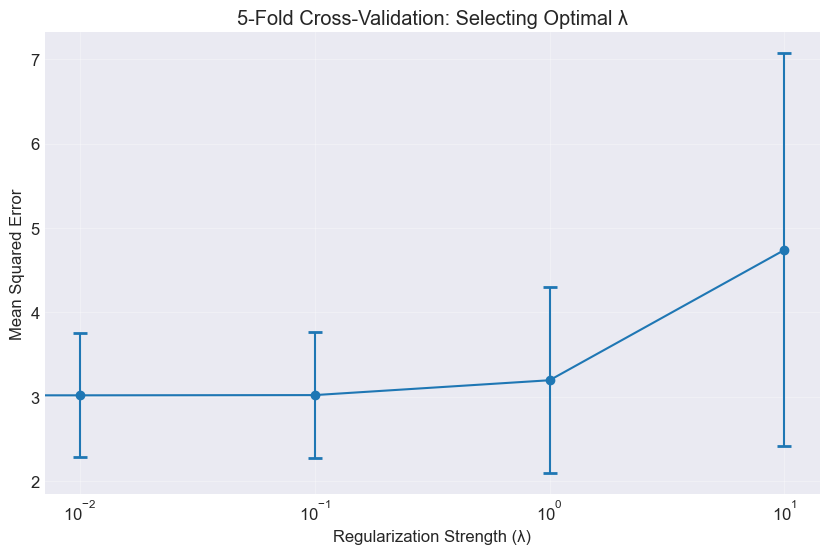

Best λ: 0.01
Mean CV MSE: 3.0182 ± 0.7353


In [11]:
# K-fold Cross Validation
from sklearn.model_selection import KFold

def k_fold_cross_validation(X, y, model_class, k=5, **model_params):
    """
    Perform k-fold cross-validation.
    
    Parameters:
    -----------
    X : array-like
        Features
    y : array-like
        Targets
    model_class : class
        Model class to instantiate
    k : int
        Number of folds
    **model_params : dict
        Parameters to pass to model
    
    Returns:
    --------
    cv_scores : list
        List of MSE scores for each fold
    """
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    cv_scores = []
    
    for train_idx, val_idx in kf.split(X):
        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]
        
        # Train model
        model = model_class(**model_params)
        model.fit(X_train_fold, y_train_fold)
        
        # Evaluate
        y_pred = model.predict(X_val_fold)
        mse = mean_squared_error(y_val_fold, y_pred)
        cv_scores.append(mse)
    
    return cv_scores

# Test different lambda values using cross-validation
lambda_candidates = [0.0, 0.01, 0.1, 1.0, 10.0]
cv_results = []

for lambda_reg in lambda_candidates:
    scores = k_fold_cross_validation(
        X_poly, y_poly, 
        RidgeRegression, 
        k=5,
        learning_rate=0.01,
        n_iterations=2000,
        lambda_reg=lambda_reg
    )
    cv_results.append({
        'lambda': lambda_reg,
        'mean_mse': np.mean(scores),
        'std_mse': np.std(scores),
        'scores': scores
    })

# Plot results
means = [r['mean_mse'] for r in cv_results]
stds = [r['std_mse'] for r in cv_results]
lambdas = [r['lambda'] for r in cv_results]

plt.figure(figsize=(10, 6))
plt.errorbar(lambdas, means, yerr=stds, marker='o', capsize=5, capthick=2)
plt.xlabel('Regularization Strength (λ)')
plt.ylabel('Mean Squared Error')
plt.title('5-Fold Cross-Validation: Selecting Optimal λ')
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.show()

# Find best lambda
best_idx = np.argmin(means)
print(f"Best λ: {lambdas[best_idx]}")
print(f"Mean CV MSE: {means[best_idx]:.4f} ± {stds[best_idx]:.4f}")

## 3.1.4 Linear Regression as Classifier

Linear regression can also be used for classification tasks. A classification task is defined as follows: given a set of parameters $X = \{x^{(1)}, \ldots, x^{(n)}\}$ belonging to a certain observation, we need to classify it into one of $m$ possible categories $y \in \{1, \ldots, m\}$.

### Binary Classification

For the case where $m = 2$ (binary classification), we need to map each point to one of two categories. Using linear regression, we can perform a mapping from $\mathbb{R}$ to $\{0, 1\}$, where each point in space is mapped to one of two possible values.

We use a threshold $T = 0.5$, and for a new point $x^{(n)}$, we compare the value $w^T x^{(n)} + b$ with the threshold value. If the new point satisfies $w^T x^{(n)} + b < 0.5$, then the new point belongs to category 1. Otherwise, the new point belongs to category 0:

$$y = \text{sign}(w^T x^{(n)} + b - 0.5) = \begin{cases} 1 & w^T x^{(n)} + b > 0.5 \\ 0 & w^T x^{(n)} + b < 0.5 \end{cases}$$

The choice of threshold $T = 0.5$ comes from the fact that there are two categories $\{0, 1\}$, and the threshold is set to be the midpoint between them.

### Example: House Floor Classification

For example: given $n$ houses, each with a known price and whether it has one or two floors. We want to find the relationship between the price and the number of floors and determine for a given house price what the number of floors is. In this case, there are 2 categories: $y \in \{0, 1\} = \{\text{1 floor}, \text{2 floors}\}$.

A way to do this is to use linear regression and check whether $w \cdot \text{price} + b$ is greater than 0.5 or less than it, where $(w, b)$ are the parameters of the linear regression.

### Loss Function for Classification

For $n$ known points – $(x^{(1)}, y^{(1)}), \ldots, (x^{(n)}, y^{(n)}), y^{(i)} \in \{0, 1\}$, the loss function is:

$$L(\theta) = \sum_{i=1}^{n} \mathbf{1}\{y^{(i)} \neq \text{sign}(w^T x^{(i)} + b - 0.5)\}$$

The function $L(\theta)$ contains a set of parameters – $\theta = (\mathbf{w}, b)$. Since the derivative of the function with respect to each parameter $w_i$ does not depend only on that parameter, it is difficult to find the optimal $\theta$ that minimizes $L(\theta)$.

### Multi-Class Classification

We can extend the classifier also for cases where there are more than two categories (multi-class). The training set will look like in the binary case, while $y^{(i)}$ now contains $m$ categories: $y^{(i)} \in \{1, \ldots, m\}$.

Instead of a single linear separator, there are $m$ linear separators, separating between different regions. To calculate the lines, we use a process called "one versus all", where each time we isolate one category and find the separation line between it and the rest of the categories.

The set of parameters will be the set consisting of all the parameters of the regression: $\theta = \{w_1, b_1, \ldots, w_m, b_m\}$.

In this case, a new point will be classified to a category according to:

$$y(x) = \arg\max_i (w_1^T x + b_1, \ldots, w_m^T x + b_m)$$

And each region will be defined according to:

$$R_i = \{x | y(x) = i\}$$

The loss function will be:

$$L(\theta) = \sum_{i=1}^{n} \mathbf{1}\{y^{(i)} \neq \hat{y}^{(i)}\} \text{ s.t. } \hat{y}^{(i)} = \arg\max_i (w_i^T x^{(i)} + b_i)$$

To find the optimal parameters that minimize the loss function:

$$\hat{\theta} = \arg\min_{\theta} L(\theta)$$

Also in this case, since the derivative of the loss function with respect to each parameter is not smooth, it is difficult to find the optimal $\theta$ that brings $L(\theta)$ to a minimum.

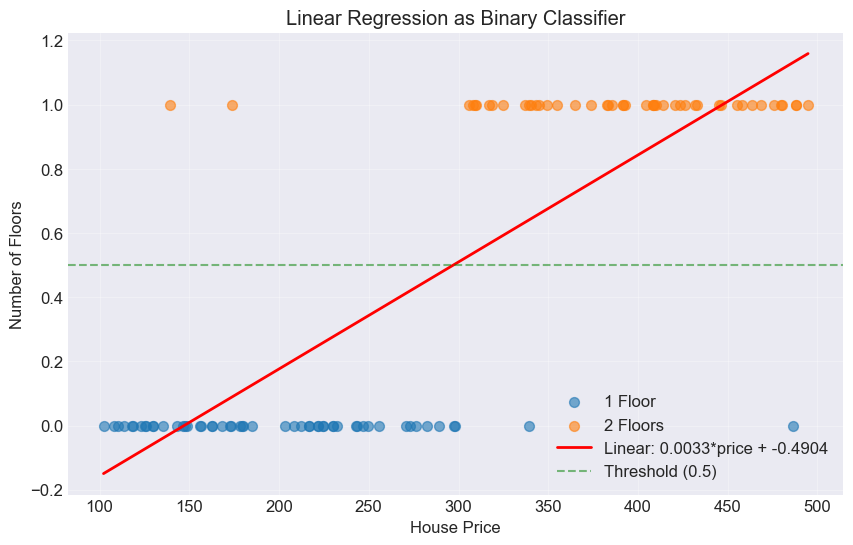

Classification Accuracy: 0.9400
Decision boundary: price = 297.07


In [12]:
# Linear Regression as Binary Classifier
def linear_classifier(X, y):
    """
    Fit linear regression and always return w as a 1-D ndarray and b as scalar.
    """
    w, b = linear_regression_closed_form(X, y)
    w = np.atleast_1d(w)  # convert scalar to array if needed
    return w, b

def predict_classifier(X, w, b, threshold=0.5):
    """
    Predict binary class using linear regression weights that may be scalar or array.
    """
    w = np.atleast_1d(w)
    # If X is (n_samples, 1) and w is (1,), X @ w works; result is 1D after flattening
    preds = (X @ w).flatten() + b
    return (preds > threshold).astype(int)

# Example: House floor classification based on price
np.random.seed(42)
# Generate synthetic data: price vs number of floors (0=1 floor, 1=2 floors)
prices = np.random.uniform(100, 500, 100).reshape(-1, 1)
# Higher prices more likely to have 2 floors
floors = ((prices.flatten() > 300) + np.random.randn(100) * 0.3 > 0.5).astype(int)

# Fit linear classifier
w_clf, b_clf = linear_classifier(prices, floors)

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(prices[floors == 0], floors[floors == 0], alpha=0.6, label='1 Floor', s=50)
plt.scatter(prices[floors == 1], floors[floors == 1], alpha=0.6, label='2 Floors', s=50)

# Plot decision boundary
price_range = np.linspace(prices.min(), prices.max(), 100).reshape(-1, 1)
w_val = np.squeeze(np.atleast_1d(w_clf))
decision_line = w_val * price_range.flatten() + b_clf
plt.plot(price_range, decision_line, 'r-', linewidth=2, label=f'Linear: {w_val:.4f}*price + {b_clf:.4f}')
plt.axhline(y=0.5, color='g', linestyle='--', alpha=0.5, label='Threshold (0.5)')
plt.xlabel('House Price')
plt.ylabel('Number of Floors')
plt.title('Linear Regression as Binary Classifier')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Make predictions
y_pred_clf = predict_classifier(prices, w_clf, b_clf)
accuracy = accuracy_score(floors, y_pred_clf)
print(f"Classification Accuracy: {accuracy:.4f}")
print(f"Decision boundary: price = {(0.5 - b_clf) / w_clf[0]:.2f}")

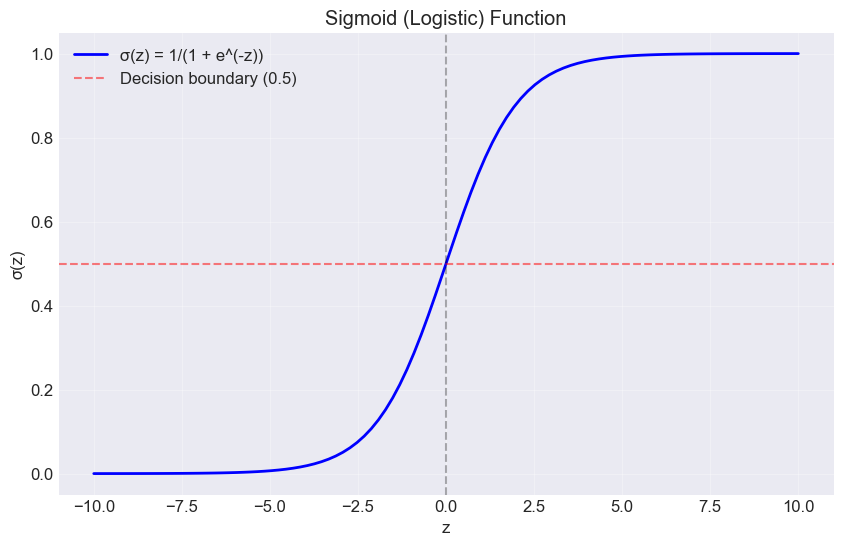

In [13]:
# Visualize the sigmoid function
def sigmoid(z):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))  # Clip to avoid overflow

z = np.linspace(-10, 10, 100)
sigma_z = sigmoid(z)

plt.figure(figsize=(10, 6))
plt.plot(z, sigma_z, 'b-', linewidth=2, label='σ(z) = 1/(1 + e^(-z))')
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='Decision boundary (0.5)')
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.title('Sigmoid (Logistic) Function')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 3.2.2 Cross Entropy and Gradient Descent

To find the optimal parameters $\theta = (w, b)$ given $n$ examples, we replace the mean squared error criterion with another criterion for minimizing the loss function – **Cross Entropy**. This criterion says that we should minimize the log of all examples (the expression comes from maximum likelihood estimation):

$$-\log P(Y | X; \theta) = -\frac{1}{n}\sum_{i=1}^{n} \log p(y^{(i)} | x^{(i)}; \theta) = L(\theta)$$

In practice, we need to find the set of parameters $\hat{\theta}$ that brings this expression to a minimum: $\hat{\theta} = \arg\min_{\theta} L(\theta)$.

### Derivative of the Sigmoid

To calculate the expression, we first need to develop the expression for the derivative of the sigmoid:

$$\sigma(z) = \frac{1}{1 + e^{-z}} \rightarrow \frac{\partial \sigma(z)}{\partial z} = \frac{1}{1 + e^{-z}} \cdot \frac{e^{-z}}{1 + e^{-z}} = \sigma(z)(1 - \sigma(z))$$

Also, $p(y = 0 | x; w, b) = 1 - p(y = 1 | x; \theta) = 1 - \sigma(\theta)$, so:

$$\frac{\partial (1 - \sigma(z))}{\partial z} = -\sigma(z)(1 - \sigma(z))$$

The derivatives of the log sigmoid are:

$$\frac{\partial \log \sigma(z)}{\partial z} = \frac{1}{\sigma(z)} \cdot \frac{\partial \sigma(z)}{\partial z} = (1 - \sigma(z))$$

$$\frac{\partial \log (1 - \sigma(z))}{\partial z} = \frac{1}{1 - \sigma(z)} \cdot \frac{\partial (1 - \sigma(z))}{\partial z} = -\sigma(z)$$

Now note that the derivative of $\log p(y = 1 | z)$ is $1 - \sigma(z) = y - \sigma(z)$, and the derivative of $\log p(y = 0 | z)$ is $0 - \sigma(z) = y^{(i)} - \sigma(z)$. Therefore, if $y \in \{0, 1\}$, we can write in short:

$$\frac{\partial}{\partial \theta} \log p(y^{(i)} | z) = y^{(i)} - \sigma(z)$$

For logistic regression, we need:

$$\frac{\partial}{\partial \theta} \log p(y^{(i)} | x^{(i)}; \theta)$$

And according to the previous development, we can write this as:

$$\frac{\partial}{\partial \theta} \log p(y^{(i)} | x^{(i)}; \theta) = (y^{(i)} - \sigma(w^T x + b)) \cdot \frac{\partial}{\partial w}(w^T x + b) = (y^{(i)} - p(y^{(i)} = 1 | x^{(i)}; \theta)) \cdot x^{(i)}$$

Now to find $\arg\min_{\theta} L(\theta)$ and substitute:

$$\frac{\partial L(\theta)}{\partial \theta} = -\frac{1}{n}\sum_{i=1}^{n} \frac{\partial}{\partial \theta} \log p(y^{(i)} | x^{(i)}; \theta) = -\frac{1}{n}\sum_{i=1}^{n} (y^{(i)} - \sigma(w^T x + b)) x^{(i)} = -\frac{1}{n}\sum_{i=1}^{n} (y^{(i)} - p(y^{(i)} = 1 | \theta; x)) x^{(i)}$$

## 3.2.3 Optimization

Similar to linear regression, here too the calculation of the optimal value of $\hat{\theta}$ will be iterative using **gradient descent**:

$$\hat{\theta}^{(t+1)} = \hat{\theta}^{(t)} - \epsilon \cdot \frac{\partial}{\partial \theta^{(t)}} L(\theta)$$

where $\epsilon$ is the **learning rate** parameter. Since the loss function $L(\theta)$ is convex, convergence to $\hat{\theta}$ is guaranteed.

### Batch vs Mini-Batch vs Stochastic Gradient Descent

When the dataset is large, and calculating the gradient for all the data is computationally expensive, we can calculate the gradient for a subset of the data and perform the update according to the direction of the resulting gradient. For example, we can choose a single random point each time. This choice is called **Stochastic Gradient Descent (SGD)**.

SGD can cause large variance as it progresses, so it is better to take a number of points. Calculating the gradient in this method is called **mini-batch learning** (as opposed to batch learning which is performed on all the data).

Formally, the gradient in the mini-batch method is:

$$\frac{\partial L}{\partial \theta} = \frac{\partial}{\partial \theta} \left[-\frac{1}{|V|}\sum_{i \in V} \log p(y^{(i)} | x^{(i)}; \theta)\right] \approx \frac{\partial}{\partial \theta} \left[-\frac{1}{n}\sum_{i=1}^{n} \log p(y^{(i)} | x^{(i)}; \theta)\right]$$

Although each step is an approximation of the gradient, the calculation is very fast relative to the exact gradient, and this is a significant advantage of this method over batch learning. In addition, it can be proven that in this method we get an unbiased estimator of the true gradient.

### Regularization in Logistic Regression

As in linear regression, in logistic regression there is also the issue of regularization, which is intended to prevent the model from giving too much weight to each point (overfitting) or not representing the data well enough (underfitting). For this purpose, we can add a constraint to the parameters:

$$L(\theta) = -\frac{1}{n}\sum_{i=1}^{n} \log p(y^{(i)} | x^{(i)}; \theta) + \lambda \|\theta\|^2$$

And then the derivative is:

$$\frac{\partial L}{\partial \theta} = -\frac{1}{n}\sum_{i=1}^{n} \frac{\partial}{\partial \theta} \log p(y^{(i)} | x^{(i)}; \theta) + 2\lambda \|\theta\|$$

The optimal parameter $\lambda$ is found using **Cross Validation** on the data.

## 3.2.4 SoftMax Regression – Multi Class Logistic Regression

As in linear regression, in logistic regression we can also generalize the model to a **multi-class** case (where there are more than two categories). Also in the generalization to the multi-category case, we need to map each category to a probability in $[0, 1]$, and for this purpose we use **SoftMax** instead of sigmoid.

SoftMax is a function applied to a sequence, and it is defined as:

$$\text{SoftMax}(z_1, \ldots, z_n) = \left(\frac{e^{z_1}}{\sum_{j=1}^{n} e^{z_j}}, \ldots, \frac{e^{z_n}}{\sum_{j=1}^{n} e^{z_j}}\right)$$

The numerator calculates an exponent to the power of $z_i$, and the denominator normalizes the result, so that the sum of all elements after the function is 1.

In the case where there are multiple categories – there are multiple separation lines, and for each one there is a set of parameters $\theta$. For a new point, we use SoftMax to give a probability to each category:

$$p(y = i | x; \theta) = \text{SoftMax}(w_1^T x + b_1, \ldots, w_m^T x + b_m)$$

To classify, we take the element with the highest probability.

Also in this model, the loss function will be **Cross Entropy**:

$$L(\theta) = -\frac{1}{n}\sum_{i=1}^{n} \log p(y^{(i)} | x^{(i)}; \theta)$$

We calculate the derivative with respect to $\theta_i$:

$$\frac{\partial}{\partial \theta_i} \log p(y^{(i)} = s | x^{(i)}; \theta) = \frac{\partial}{\partial \theta_i} \log \frac{\exp(w_s^T x + b_s)}{\sum_{j=1}^{m} \exp(w_j^T x + b_j)} = \frac{\partial}{\partial \theta_i} \left[w_s^T x + b_s - \log \sum_{j=1}^{m} \exp(w_j^T x + b_j)\right]$$

$$= \mathbf{1}\{i = s\} x - \frac{\exp(w_i^T x + b_i) x}{\sum_{j=1}^{m} \exp(w_j^T x + b_j)} = (\mathbf{1}\{i = s\} - p(y = i | x)) x$$

where the notation $\mathbf{1}\{i = s\}$ is 1 if $i = s$ and 0 otherwise.

Now we can substitute the last expression in the derivative of $L(\theta)$:

$$\frac{\partial L}{\partial \theta_i} = -\frac{1}{n}\sum_{t=1}^{n} (\mathbf{1}\{y^{(t)} = i\} - p(y^{(t)} = i | x^{(t)}; \theta)) x^{(t)}$$

To find the optimal $\theta$ using gradient descent:

$$\theta_i^{(t+1)} = \theta_i^{(t)} - \epsilon \frac{\partial L}{\partial \theta}$$

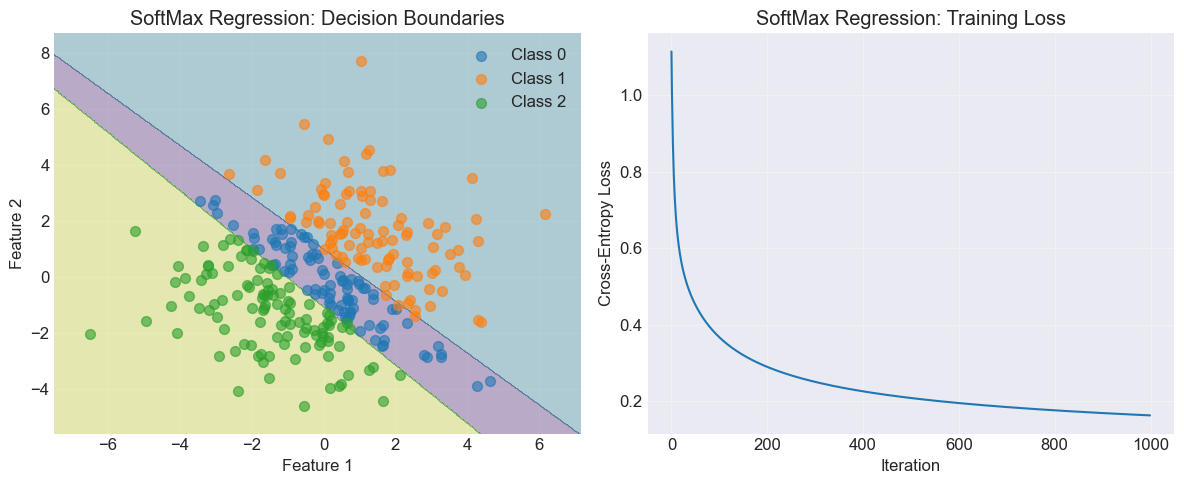

Multi-class Classification Accuracy: 0.9833


In [14]:
# SoftMax Regression - Multi-Class Classification
def softmax(z):
    """SoftMax function for multi-class classification."""
    # Subtract max for numerical stability
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

class SoftMaxRegression:
    """
    SoftMax Regression for multi-class classification.
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000, n_classes=3):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.n_classes = n_classes
        self.W = None
        self.b = None
        self.loss_history = []
        
    def fit(self, X, y):
        """
        Train the SoftMax regression model.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training data
        y : array-like, shape (n_samples,)
            Class labels (0 to n_classes-1)
        """
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.W = np.random.randn(n_features, self.n_classes) * 0.01
        self.b = np.zeros(self.n_classes)
        
        # Gradient descent
        for i in range(self.n_iterations):
            # Forward pass
            z = X @ self.W + self.b
            probs = softmax(z)
            
            # One-hot encode labels
            y_one_hot = np.eye(self.n_classes)[y]
            
            # Compute gradients
            dW = -(1/n_samples) * X.T @ (y_one_hot - probs)
            db = -(1/n_samples) * np.sum(y_one_hot - probs, axis=0)
            
            # Update parameters
            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db
            
            # Store loss (cross-entropy)
            loss = -np.mean(np.sum(y_one_hot * np.log(probs + 1e-15), axis=1))
            self.loss_history.append(loss)
            
    def predict_proba(self, X):
        """Predict class probabilities."""
        z = X @ self.W + self.b
        return softmax(z)
        
    def predict(self, X):
        """Predict class labels."""
        probs = self.predict_proba(X)
        return np.argmax(probs, axis=1)

# Generate multi-class data
np.random.seed(42)
n_samples = 300
X_multi = np.random.randn(n_samples, 2) * 2
# Create 3 classes
y_multi = np.zeros(n_samples, dtype=int)
y_multi[X_multi[:, 0] + X_multi[:, 1] > 1] = 1
y_multi[X_multi[:, 0] + X_multi[:, 1] < -1] = 2

# Train SoftMax regression
model_softmax = SoftMaxRegression(learning_rate=0.1, n_iterations=1000, n_classes=3)
model_softmax.fit(X_multi, y_multi)

# Visualize
plt.figure(figsize=(12, 5))

# Plot 1: Data and decision boundaries
plt.subplot(1, 2, 1)
h = 0.02
x_min, x_max = X_multi[:, 0].min() - 1, X_multi[:, 0].max() + 1
y_min, y_max = X_multi[:, 1].min() - 1, X_multi[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model_softmax.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
for i in range(3):
    plt.scatter(X_multi[y_multi == i, 0], X_multi[y_multi == i, 1], 
                alpha=0.6, label=f'Class {i}', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SoftMax Regression: Decision Boundaries')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Loss history
plt.subplot(1, 2, 2)
plt.plot(model_softmax.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Cross-Entropy Loss')
plt.title('SoftMax Regression: Training Loss')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Evaluate
y_pred_multi = model_softmax.predict(X_multi)
accuracy = accuracy_score(y_multi, y_pred_multi)
print(f"Multi-class Classification Accuracy: {accuracy:.4f}")

## 3.2.5 SoftMax Regression as Neural Network

The logistic regression method has several advantages: it is relatively easy to train, provides good accuracy for separable data, is stable against overfitting, offers probabilistic classification, and is suitable also for cases where there are more than two categories.

However, it has a significant disadvantage – the separation lines of the model are linear. This is a limitation, as in many cases, in order to build a model capable of separating between different categories, we need a non-linear separation mechanism.

A common way to build non-linear models is to use deep neural networks, and to understand their concept, we need to understand that neural networks are essentially a generalization of the models we have seen so far.

The **Linear regression** problem takes a set of features and multiplies each one by a weight, and then sums all the elements (along with bias) into a single variable that determines what the category of this set is.

We can represent the model by the following graphical description:

![Linear Regression as Neural Network](https://via.placeholder.com/400x200?text=Linear+Regression+as+Neural+Network)

In this description, there are 2 features that form the input, and each one is connected to the output through a weight. There is also a bias, and together with the features multiplied by weights and the bias, we get the output: $F(x) = w^T x + b = w_1 x_1 + w_2 x_2 + b$.

Each circle in the figure is called an **artificial neuron** – an element that can receive input, perform a computational operation, and output a result.

Logistic regression can be described similarly, where the neurons of the input set are not directly connected to the output but pass through a sigmoid in the binary case or through SoftMax in the case where there are multiple categories:

![Logistic Regression as Neural Network](https://via.placeholder.com/400x200?text=Logistic+Regression+as+Neural+Network)

In addition to passing through the sigmoid function, there is another difference between the representation of linear regression and the representation of logistic regression: while linear regression provides a single number in the output (hard classifier), logistic regression provides a vector of length equal to the number of categories, where for each category there is a certain probability that the input belongs to it.

In the next chapter, we will see that by adding more layers between the input and output, the model that will be obtained will be a mapping of a set of features in a non-linear way to a probability vector in the output. The flexibility of the model will allow dealing with tasks with non-linear data.

Linear Regression as Neural Network:


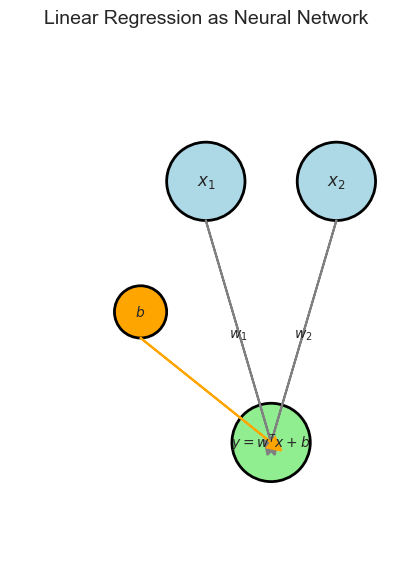


Logistic Regression as Neural Network:


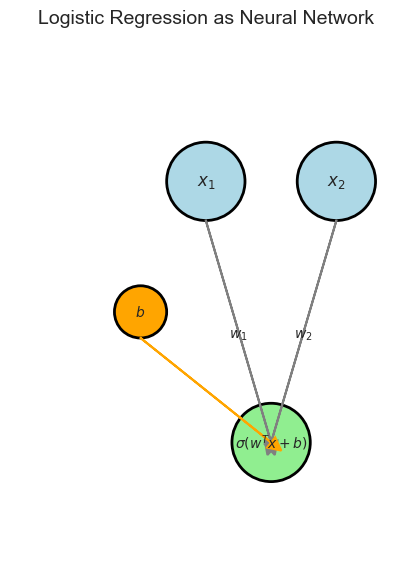

In [15]:
# Visualize Linear and Logistic Regression as Neural Networks
import matplotlib.patches as mpatches

def plot_neural_network_representation(model_type='linear'):
    """Visualize linear/logistic regression as a simple neural network."""
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Input layer
    input_x = [1, 2]
    input_y = [3, 3]
    for i, (x, y) in enumerate(zip(input_x, input_y)):
        circle = plt.Circle((x, y), 0.3, color='lightblue', ec='black', lw=2)
        ax.add_patch(circle)
        ax.text(x, y, f'$x_{i+1}$', ha='center', va='center', fontsize=12)
    
    # Output layer
    if model_type == 'linear':
        output_x = [1.5]
        output_y = [1]
        output_label = '$y = w^T x + b$'
    else:  # logistic
        output_x = [1.5]
        output_y = [1]
        output_label = '$\\sigma(w^T x + b)$'
    
    circle = plt.Circle((output_x[0], output_y[0]), 0.3, color='lightgreen', ec='black', lw=2)
    ax.add_patch(circle)
    ax.text(output_x[0], output_y[0], output_label, ha='center', va='center', fontsize=10)
    
    # Bias
    bias_x = 0.5
    bias_y = 2
    circle = plt.Circle((bias_x, bias_y), 0.2, color='orange', ec='black', lw=2)
    ax.add_patch(circle)
    ax.text(bias_x, bias_y, '$b$', ha='center', va='center', fontsize=10)
    
    # Connections
    for i, (x_in, y_in) in enumerate(zip(input_x, input_y)):
        ax.arrow(x_in, y_in-0.3, output_x[0]-x_in, output_y[0]-(y_in-0.3), 
                head_width=0.1, head_length=0.1, fc='gray', ec='gray', lw=1.5)
        ax.text((x_in + output_x[0])/2, (y_in + output_y[0])/2 - 0.2, 
                f'$w_{i+1}$', fontsize=10, ha='center')
    
    # Bias connection
    ax.arrow(bias_x, bias_y-0.2, output_x[0]-bias_x, output_y[0]-(bias_y-0.2),
            head_width=0.1, head_length=0.1, fc='orange', ec='orange', lw=1.5)
    
    ax.set_xlim(-0.5, 2.5)
    ax.set_ylim(0, 4)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f'{model_type.capitalize()} Regression as Neural Network', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

# Plot both representations
print("Linear Regression as Neural Network:")
plot_neural_network_representation('linear')

print("\nLogistic Regression as Neural Network:")
plot_neural_network_representation('logistic')

In [16]:
class LogisticRegression:
    """
    Logistic Regression for binary classification using Gradient Descent.
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.w = None
        self.b = None
        self.loss_history = []
        
    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))
        
    def fit(self, X, y):
        """
        Train the logistic regression model.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training data
        y : array-like, shape (n_samples,)
            Binary labels (0 or 1)
        """
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.w = np.random.randn(n_features) * 0.01
        self.b = 0.0
        
        # Gradient descent
        for i in range(self.n_iterations):
            # Forward pass
            z = X @ self.w + self.b
            y_pred = self.sigmoid(z)
            
            # Compute gradients
            dw = (1/n_samples) * X.T @ (y_pred - y)
            db = (1/n_samples) * np.sum(y_pred - y)
            
            # Update parameters
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db
            
            # Store loss (binary cross-entropy)
            loss = -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
            self.loss_history.append(loss)
            
    def predict_proba(self, X):
        """Predict probabilities."""
        z = X @ self.w + self.b
        return self.sigmoid(z)
        
    def predict(self, X, threshold=0.5):
        """Predict binary labels."""
        return (self.predict_proba(X) >= threshold).astype(int)

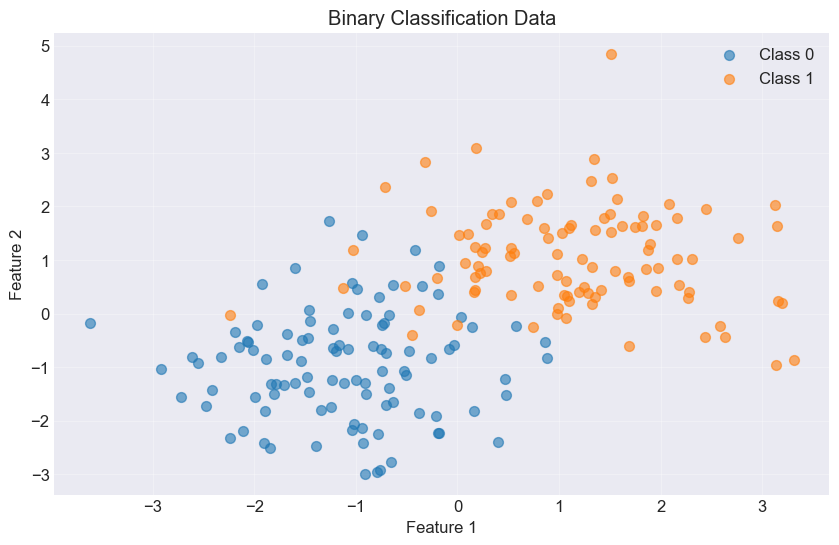

In [17]:
# Generate synthetic binary classification data
def generate_classification_data(n=200, n_features=2, random_state=42):
    """Generate synthetic binary classification data."""
    np.random.seed(random_state)
    
    # Create two classes
    n_per_class = n // 2
    
    # Class 0: centered at (-1, -1)
    X0 = np.random.randn(n_per_class, n_features) + np.array([-1, -1])
    y0 = np.zeros(n_per_class)
    
    # Class 1: centered at (1, 1)
    X1 = np.random.randn(n_per_class, n_features) + np.array([1, 1])
    y1 = np.ones(n_per_class)
    
    # Combine
    X = np.vstack([X0, X1])
    y = np.hstack([y0, y1])
    
    # Shuffle
    indices = np.random.permutation(n)
    X = X[indices]
    y = y[indices]
    
    return X, y

# Generate and visualize data
X_clf, y_clf = generate_classification_data(n=200, n_features=2)

plt.figure(figsize=(10, 6))
plt.scatter(X_clf[y_clf == 0, 0], X_clf[y_clf == 0, 1], alpha=0.6, label='Class 0', s=50)
plt.scatter(X_clf[y_clf == 1, 0], X_clf[y_clf == 1, 1], alpha=0.6, label='Class 1', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

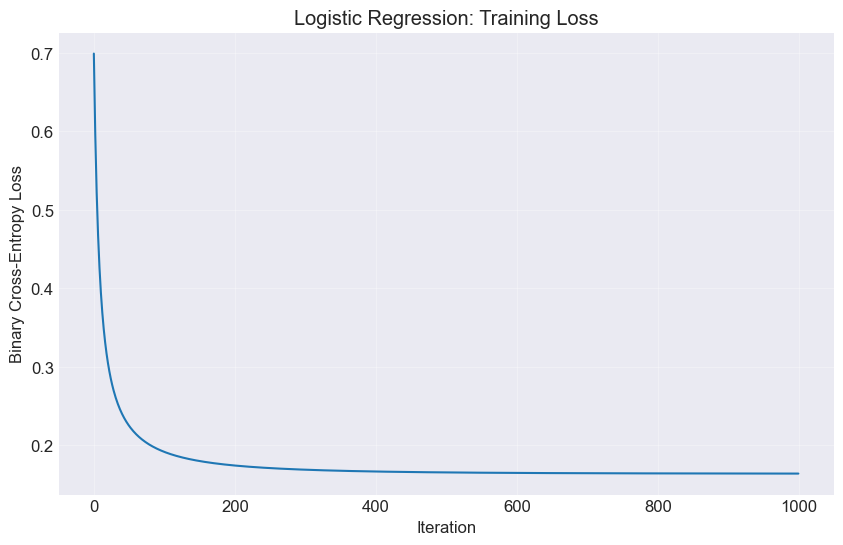

Test Accuracy: 0.9500


In [18]:
# Train logistic regression model
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

model_lr = LogisticRegression(learning_rate=0.1, n_iterations=1000)
model_lr.fit(X_train_clf, y_train_clf)

# Plot loss history
plt.figure(figsize=(10, 6))
plt.plot(model_lr.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Logistic Regression: Training Loss')
plt.grid(True, alpha=0.3)
plt.show()

# Evaluate
y_pred_clf = model_lr.predict(X_test_clf)
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Test Accuracy: {accuracy:.4f}")

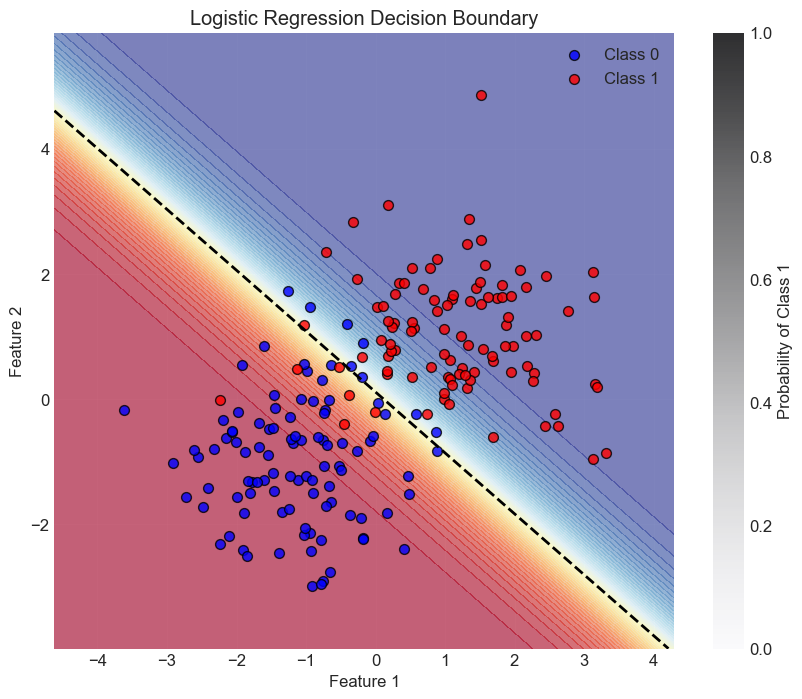

In [19]:
# Visualize decision boundary
def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    """Plot decision boundary for 2D classification."""
    # Create a mesh
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict on mesh
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, levels=50, alpha=0.6, cmap='RdYlBu')
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2, linestyles='--')
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', alpha=0.8, label='Class 0', s=50, edgecolors='black')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', alpha=0.8, label='Class 1', s=50, edgecolors='black')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.colorbar(label='Probability of Class 1')
    plt.grid(True, alpha=0.3)
    plt.show()

plot_decision_boundary(X_clf, y_clf, model_lr, "Logistic Regression Decision Boundary")

## Summary

In this chapter, we've covered:

1. **Linear Regression**:
   - Basic concept and mathematical formulation
   - Closed-form solution using normal equations
   - Gradient descent optimization
   - Regularization (Ridge regression)
   - Cross-validation for model selection

2. **Logistic Regression**:
   - Binary classification using sigmoid function
   - Binary cross-entropy loss
   - Gradient descent for logistic regression
   - Decision boundary visualization

### Key Takeaways

- **Linear regression** predicts continuous values using a linear relationship between features and target
- **Gradient descent** is an iterative optimization method that finds optimal parameters by following the negative gradient
- **Regularization** helps prevent overfitting by penalizing large weights
- **Cross-validation** is essential for selecting hyperparameters and assessing model performance
- **Logistic regression** extends linear models to binary classification using the sigmoid activation function

These concepts form the foundation for understanding neural networks, which we'll explore in later chapters.